In [66]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import random

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
torch.cuda.is_available()

True

In [49]:
# Ma'lumotlarni transformatsiya qilish

transform = transforms.Compose([
    transforms.ToTensor(), # rasmlarni tensorga o'tkazish
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # normallashtirish
])

In [50]:
# Shug'gullantiruvchi ma'lumotimiz: MNIST

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [51]:
# Loaderga o'tkazib olamiz

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=False)

In [52]:
misol = next(iter(train_loader))
misol[0].shape

torch.Size([64, 1, 28, 28])

In [53]:
# Modelni yaratib olish

class OddiyCNN(nn.Module):
    def __init__(self):
        super(OddiyCNN, self).__init__()

        self.net = nn.Sequential(
            nn.Conv2d(in_channels = 1,
                      out_channels = 16,
                      kernel_size = 3 ,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2),

            nn.Conv2d(in_channels = 16 ,
                     out_channels = 32 ,
                     kernel_size = 3 ,
                     padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride  = 2),

            nn.Flatten(),
            nn.Linear(32 * 7 * 7 , 128),
            nn.ReLU(),
            nn.Linear(128 , 10)
        )

    def forward(self, x):
        return self.net(x)

In [54]:
model = OddiyCNN().to(device)

creterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [55]:
epoxa = 10
for epoch in range(epoxa):
  model.train()
  total_loss = 0
  for data,target in train_loader:
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()
    #Forward
    output = model(data)
    loss = creterion(output,target)
    #Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  print(f"Expoxa : {epoch+1}, O'rtacha yuqotish: {total_loss/len(train_loader)}")


Expoxa : 1, O'rtacha yuqotish: 0.22637111132394577
Expoxa : 2, O'rtacha yuqotish: 0.0688500264158119
Expoxa : 3, O'rtacha yuqotish: 0.04614688841991428
Expoxa : 4, O'rtacha yuqotish: 0.03615718788095265
Expoxa : 5, O'rtacha yuqotish: 0.028682190312694054
Expoxa : 6, O'rtacha yuqotish: 0.024435054772704252
Expoxa : 7, O'rtacha yuqotish: 0.01878703403731757
Expoxa : 8, O'rtacha yuqotish: 0.015221987708477859
Expoxa : 9, O'rtacha yuqotish: 0.012332108789146555
Expoxa : 10, O'rtacha yuqotish: 0.010559345832713115


Rasm 1 -> Model: 2 | Aslida: 2
Rasm 2 -> Model: 1 | Aslida: 1
Rasm 3 -> Model: 0 | Aslida: 0
Rasm 4 -> Model: 4 | Aslida: 4


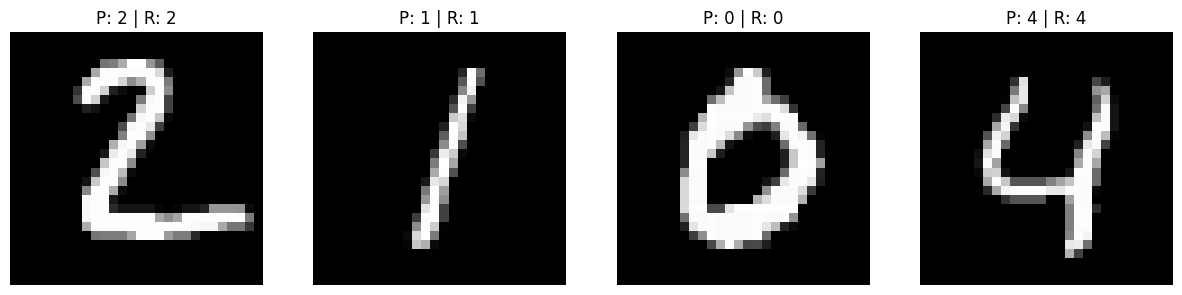

In [73]:
# TEST

images, labels = next(iter(test_loader))

model.eval()
with torch.no_grad():
    start = 1
    end = random.randint(start + 1, start + 10)
    test_batch = images[start:end].to(device)
    outputs = model(test_batch)
    predictions = outputs.argmax(dim=1)

num_images = len(predictions)
fig, ax = plt.subplots(1, num_images, figsize=(15, 5))

for i in range(num_images):
    pred = predictions[i].item()
    real = labels[start + i].item()

    print(f"Rasm {i+1} -> Model: {pred} | Aslida: {real}")

    ax[i].imshow(images[start + i].squeeze(), cmap='gray')
    ax[i].set_title(f"P: {pred} | R: {real}")
    ax[i].axis('off')

plt.show()